<a href="https://colab.research.google.com/github/sooyeonlove25/ConvenienceStore2/blob/main/sooyeon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 7. ✅ 연도별 피해 추이 분석
#목적: 시간이 지남에 따라 사기 피해가 줄고 있는지, 늘고 있는지 확인
#분석: 최초 접수년 vs 피해 건수, 총 피해액

# 8. ✅ 사기유형별 피해자 특성 분석
#목적: 각 사기 유형에 어떤 성별/연령대가 주로 노출되는지 분석
#분석: 사기유형 vs 성별, 연령대

# 9. ✅ 고위험 조합 탐색 (예: 고령+전화+금융기관 사칭)
#목적: 피해가 큰 조건 조합 파악 → 정책 제안 가능
# 분석: 다변량 분석 (ex. 연령대 + 접근매체 + 사칭기관 → 피해액)

In [ ]:
# 7. 연도별 피해 추이 분석
# groupby()와 agg() 함수로 연도별 피해 건수 및 총 피해액을 집계.
# matplotlib이나 seaborn을 사용 -> 연도별 피해 추이

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.read_csv("우체국금융개발원_우체국 금융 사기계좌 정보_20241231.csv", encoding='cp949')

,연령대,피해자 성별,최초 접수년,최초 접수월,피해자계좌_피해(송금)액,사기유형,사칭기관,피해구제 신청사유,접근매체
0,20,남,2022,1,990000,사건연루조사,경찰. 검찰. 법원,보이스피싱,전화
1,20,남,2022,1,300000,사건연루조사,경찰. 검찰. 법원,보이스피싱,전화
2,30,남,2022,1,1000000,지인사칭(메신저피싱),개인,보이스피싱,문자
3,30,여,2022,1,118000000,사건연루조사,경찰. 검찰. 법원,보이스피싱,전화
4,40,여,2022,1,33800000,기존대출 상환,할부금융(카드사 및 캐피탈),일반대출,문자
...,...,...,...,...,...,...,...,...,...
2579,40,여,2024,12,20000000,대출실행 후 상환,저축은행,일반대출,전화
2580,30,남,2024,12,109450000,기타,우체국. 전화국. 택배회사,일반대출,전화
2581,50,남,2024,12,46800000,기존대출 상환,시중은행,일반대출,메신저
2582,20,남,2024,12,82000000,기타,시중은행,일반대출,전화


In [ ]:
data = pd.read_csv("우체국금융개발원_우체국 금융 사기계좌 정보_20241231.csv", encoding='cp949')

In [ ]:
# 데이터 확인 -> 상위 5개 행 출력
print(data.head(5))

   연령대 피해자 성별  최초 접수년  최초 접수월  피해자계좌_피해(송금)액         사기유형             사칭기관  \
0   20      남    2022       1         990000       사건연루조사       경찰. 검찰. 법원   
1   20      남    2022       1         300000       사건연루조사       경찰. 검찰. 법원   
2   30      남    2022       1        1000000  지인사칭(메신저피싱)               개인   
3   30      여    2022       1      118000000       사건연루조사       경찰. 검찰. 법원   
4   40      여    2022       1       33800000      기존대출 상환  할부금융(카드사 및 캐피탈)   

  피해구제 신청사유 접근매체  
0     보이스피싱   전화  
1     보이스피싱   전화  
2     보이스피싱   문자  
3     보이스피싱   전화  
4      일반대출   문자  


In [ ]:
# 데이터 확인 -> 컬럼명 확인
print(data.columns)

Index(['연령대', '피해자 성별', '최초 접수년', '최초 접수월', '피해자계좌_피해(송금)액', '사기유형', '사칭기관',
       '피해구제 신청사유', '접근매체'],
      dtype='object')


In [ ]:
# 데이터 확인 -> 데이터 타입 확인
print(data.dtypes)

연령대               int64
피해자 성별           object
최초 접수년            int64
최초 접수월            int64
피해자계좌_피해(송금)액     int64
사기유형             object
사칭기관             object
피해구제 신청사유        object
접근매체             object
dtype: object


In [ ]:
# 연도별 피해 건수(연도별 사건 개수)와 총 피해액 집계

yearly_stats = data.groupby("최초 접수년").agg(
    피해_건수=("최초 접수년", "count"),
    총_피해액=("피해자계좌_피해(송금)액", "sum")
).reset_index()

In [ ]:
print(yearly_stats.head())  # 데이터 확인

   최초 접수년  피해_건수        총_피해액
0    2022    829   6450473729
1    2023    874  18112925525
2    2024    881  31290597981


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 윈도우 한글 폰트 경로 설정 (기본적으로 설치된 'Malgun Gothic' 폰트 사용)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 윈도우에서 기본 설치된 폰트 경로
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

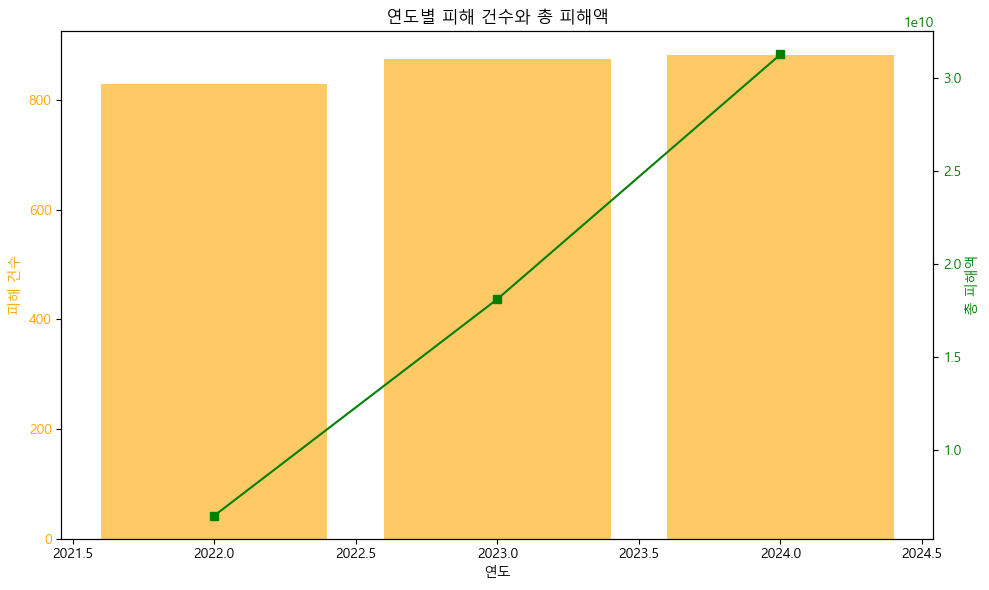

In [ ]:
# 1. 연도별 피해 건수와 총 피해액을 한 번에 그리기 위해 figure 생성
fig, ax1 = plt.subplots(figsize=(10, 6))

# 2. 연도별 피해 건수 그래프 (왼쪽 y축: orange)
ax1.bar(yearly_stats['최초 접수년'],
        yearly_stats['피해_건수'],
        color='orange',
        alpha=0.6,
        label='피해 건수')
ax1.set_xlabel('연도')
ax1.set_ylabel('피해 건수', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# 3. 총 피해액 그래프 (오른쪽 y축: green)
ax2 = ax1.twinx()  # 두 번째 축 생성
ax2.plot(yearly_stats['최초 접수년'],
         yearly_stats['총_피해액'],
         color='green',
         marker='s',
         label='총 피해액')
ax2.set_ylabel('총 피해액', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 4. 그래프 제목
plt.title('연도별 피해 건수와 총 피해액')

# 5. 레이블 표시
fig.tight_layout()

# 6. 그래프 보여주기
plt.show()

In [ ]:
# fig, ax1 = plt.subplots(): 하나의 큰 그래프, 첫 번째 축을 ax1로 지정합니다.
# ax1.bar(): 연도별 피해 건수를 바 차트
# ax2 = ax1.twinx(): ax1의 y축을 공유하는 두 번째 축
# ax2.plot(): 두 번째 축에서 총 피해액을 선 그래프로
# marker='s' -> 정사각형(square)
# fig.tight_layout(): 레이아웃을 자동으로 조정하여 그래프가 겹치지 않도록
# plt.show(): 그래프를 화면에 출력

In [ ]:
# 8. 사기유형별 피해자 특성 분석
# 사기유형을 기준으로
# groupby()와 agg()를 사용 -> 사기 유형에 따른 성별, 연령대별 피해 건수와 피해액

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.read_csv("우체국금융개발원_우체국 금융 사기계좌 정보_20241231.csv", encoding='cp949')

,연령대,피해자 성별,최초 접수년,최초 접수월,피해자계좌_피해(송금)액,사기유형,사칭기관,피해구제 신청사유,접근매체
0,20,남,2022,1,990000,사건연루조사,경찰. 검찰. 법원,보이스피싱,전화
1,20,남,2022,1,300000,사건연루조사,경찰. 검찰. 법원,보이스피싱,전화
2,30,남,2022,1,1000000,지인사칭(메신저피싱),개인,보이스피싱,문자
3,30,여,2022,1,118000000,사건연루조사,경찰. 검찰. 법원,보이스피싱,전화
4,40,여,2022,1,33800000,기존대출 상환,할부금융(카드사 및 캐피탈),일반대출,문자
...,...,...,...,...,...,...,...,...,...
2579,40,여,2024,12,20000000,대출실행 후 상환,저축은행,일반대출,전화
2580,30,남,2024,12,109450000,기타,우체국. 전화국. 택배회사,일반대출,전화
2581,50,남,2024,12,46800000,기존대출 상환,시중은행,일반대출,메신저
2582,20,남,2024,12,82000000,기타,시중은행,일반대출,전화


In [ ]:
# 성별에 따른 집계 (사기유형별)

gender_stats = data.groupby(['사기유형', '피해자 성별']).agg(
    피해_건수=("사기유형", "count"),
    총_피해액=("피해자계좌_피해(송금)액", "sum")
).reset_index()

In [ ]:
# 연령대에 따른 집계 (사기유형별)

age_stats = data.groupby(['사기유형', '연령대']).agg(
    피해_건수=("사기유형", "count"),
    총_피해액=("피해자계좌_피해(송금)액", "sum")
).reset_index()

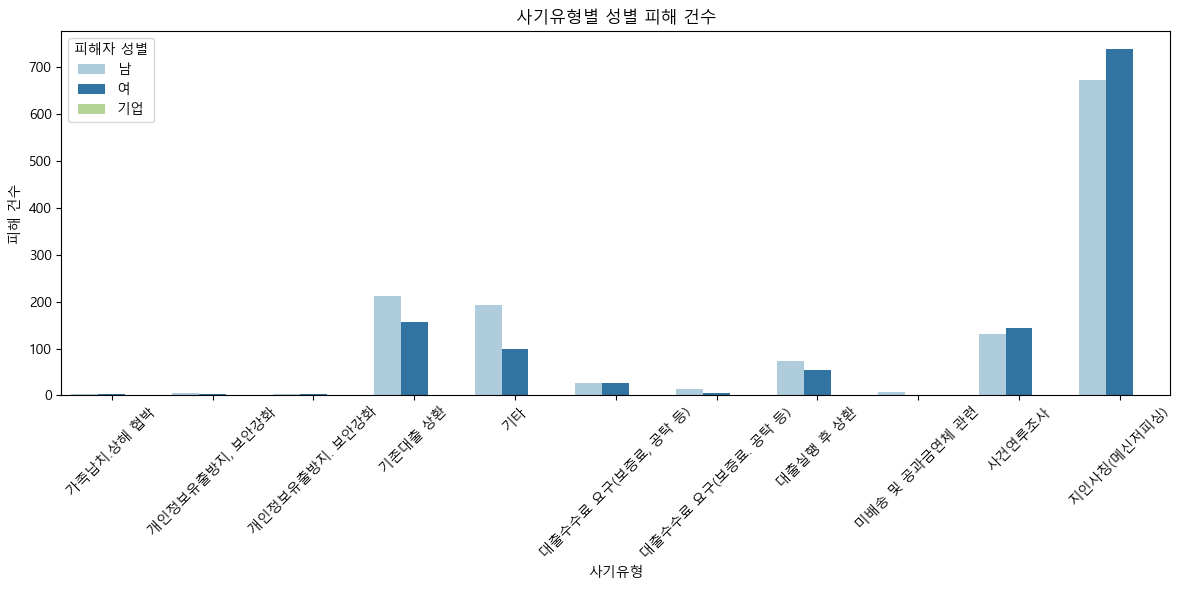

In [ ]:
# 3. 성별(-> Paired -> 파스텔톤)에 따른 피해 건수 시각화 (사기유형별)

plt.figure(figsize=(12, 6))
sns.barplot(x="사기유형",
            y="피해_건수",
            hue="피해자 성별",
            data=gender_stats,
            palette="Paired")

plt.title("사기유형별 성별 피해 건수")
plt.xlabel("사기유형")
plt.ylabel("피해 건수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

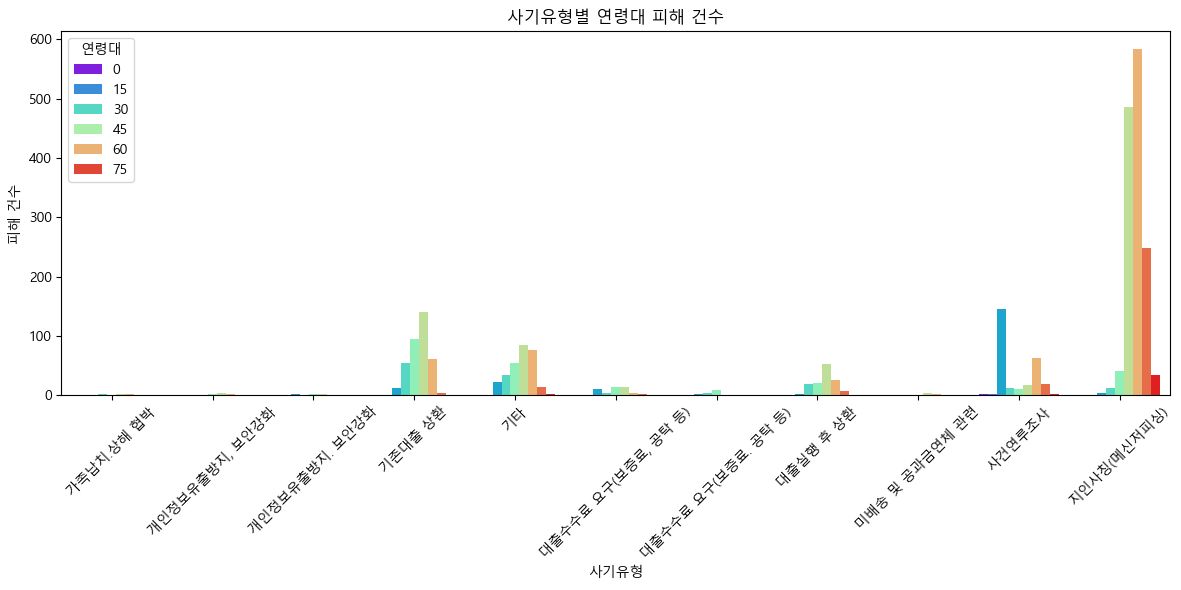

In [ ]:
# 4. 연령대(-> rainbow -> 무지개 색상)에 따른 피해 건수 시각화 (사기유형별)

plt.figure(figsize=(12, 6))
sns.barplot(x="사기유형",
            y="피해_건수",
            hue="연령대",
            data=age_stats,
            palette="rainbow")

plt.title("사기유형별 연령대 피해 건수")
plt.xlabel("사기유형")
plt.ylabel("피해 건수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# gender_stats: 사기유형별로 성별에 따른 피해 건수 및 총 피해액
# age_stats: 사기유형별로 연령대에 따른

# 성별,연령대 -> 피해 건수 시각화: sns.barplot()
# plt.tight_layout() -> 레이아웃이 겹치지 않도록
# plt.xticks(rotation=45) -> x축 레이블 -> 회전

# sns.barplot(x='x축 변수', y='y축 변수', data='데이터프레임', hue='그룹화 변수', palette='색상 팔레트')

In [ ]:
# 9. ✅ 고위험 조합 탐색 (예: 고령+전화+금융기관 사칭)
#목적: 피해가 큰 조건 조합 파악 → 정책 제안 가능
# 분석: 다변량 분석 (ex. 연령대 + 접근매체 + 사칭기관 → 피해액)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.read_csv("우체국금융개발원_우체국 금융 사기계좌 정보_20241231.csv", encoding='cp949')

,연령대,피해자 성별,최초 접수년,최초 접수월,피해자계좌_피해(송금)액,사기유형,사칭기관,피해구제 신청사유,접근매체
0,20,남,2022,1,990000,사건연루조사,경찰. 검찰. 법원,보이스피싱,전화
1,20,남,2022,1,300000,사건연루조사,경찰. 검찰. 법원,보이스피싱,전화
2,30,남,2022,1,1000000,지인사칭(메신저피싱),개인,보이스피싱,문자
3,30,여,2022,1,118000000,사건연루조사,경찰. 검찰. 법원,보이스피싱,전화
4,40,여,2022,1,33800000,기존대출 상환,할부금융(카드사 및 캐피탈),일반대출,문자
...,...,...,...,...,...,...,...,...,...
2579,40,여,2024,12,20000000,대출실행 후 상환,저축은행,일반대출,전화
2580,30,남,2024,12,109450000,기타,우체국. 전화국. 택배회사,일반대출,전화
2581,50,남,2024,12,46800000,기존대출 상환,시중은행,일반대출,메신저
2582,20,남,2024,12,82000000,기타,시중은행,일반대출,전화


In [ ]:
data = pd.read_csv("우체국금융개발원_우체국 금융 사기계좌 정보_20241231.csv", encoding='cp949')

In [ ]:
# 연령대, 접근매체, 사칭기관, 피해자계좌_피해(송금)액 -> 사용
# 피해액과 관련된 변수(연령대, 접근매체, 사칭기관)
target = data[["연령대", "접근매체", "사칭기관", "피해자계좌_피해(송금)액"]]

In [ ]:
# 피해액 합계(그룹) -> ex. 연령대 + 접근매체 + 사칭기관
grouped = target.groupby(["연령대", "접근매체", "사칭기관"])["피해자계좌_피해(송금)액"].sum().reset_index()

In [ ]:
# 피해액이 높은 조합을 파악
# 정렬: 피해액을 기준으로 내림차순 정렬
# 상위 10개: 피해 규모가 가장 큰 조합 Top 10을 추출

top_combinations = grouped.sort_values(by="피해자계좌_피해(송금)액", ascending=False).head(10)
print(top_combinations)

     연령대 접근매체        사칭기관  피해자계좌_피해(송금)액
134   60   전화    금감원. 금융위     4317900000
123   60   문자          개인     3305821234
93    50   문자          개인     3187775219
154   70   전화    금감원. 금융위     2644110000
145   70   문자          개인     2571744526
133   60   전화  경찰. 검찰. 법원     2557350000
166   80   전화  경찰. 검찰. 법원     1839000000
20    20   전화  경찰. 검찰. 법원     1826630337
111   50   전화        시중은행     1803377000
161   80   기타  경찰. 검찰. 법원     1729000000


In [ ]:
# 한글 깨짐 방지 설정(Windows)
import matplotlib
matplotlib.rc("font", family="Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

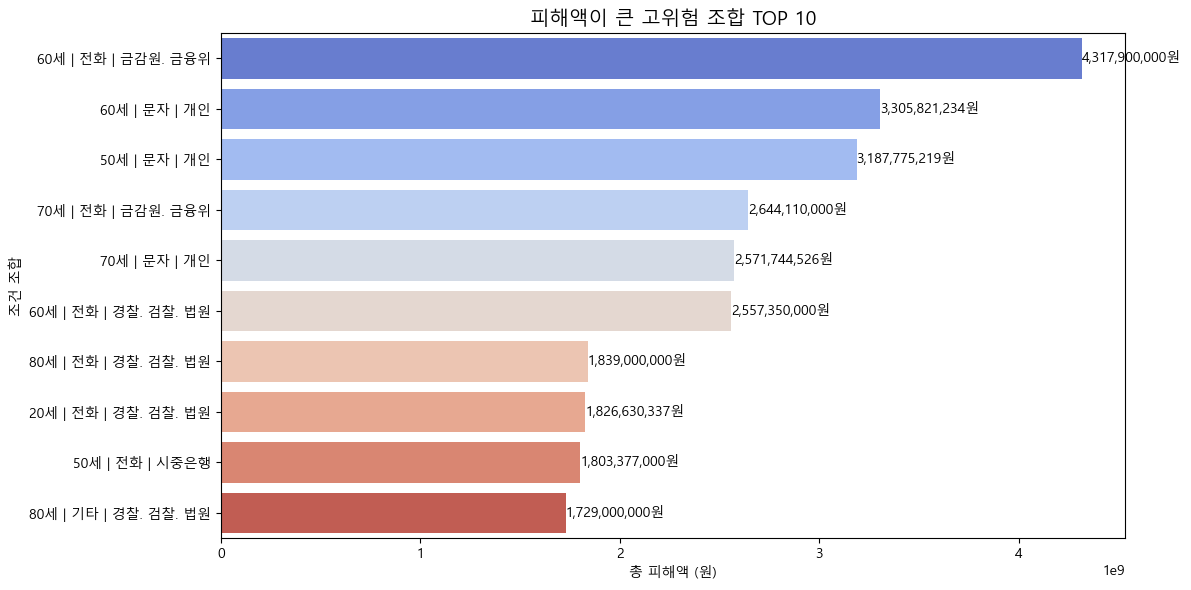

In [ ]:
# 조건 조합 텍스트 컬럼 생성
# 3개 항목 -> 연령대, 접근매체, 사칭기관 -> 하나의 문자열로 합쳐서 y축

top_combinations["조합"] = top_combinations.apply(
    lambda row: f"{row['연령대']}세 | {row['접근매체']} | {row['사칭기관']}", axis=1
)

# 시각화(막대그래프)
# x축 -> 피해액 (금액)
# 색상 -> "coolwarm"	파랑 ↔ 빨강 대비 색상

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_combinations,
    x="피해자계좌_피해(송금)액",
    y="조합",
    hue="조합",  # 컬러를 '조합' 기준으로 할당
    dodge=False,  # 겹치지 않게 막기
    palette=sns.color_palette("coolwarm", len(top_combinations)),
    legend=False  # 범례 안 보이게
)

# tight_layout() -> 글자 겹침 방지

plt.title("피해액이 큰 고위험 조합 TOP 10", fontsize=14)
plt.xlabel("총 피해액 (원)")
plt.ylabel("조건 조합")

# y축에 조건 조합 텍스트
# x축은 피해액 (원)

# 막대 옆에 피해액 숫자 표시 (천 단위 콤마) -> 각 막대 오른쪽에 피해 금액 표시
for i, value in enumerate(top_combinations["피해자계좌_피해(송금)액"]):
    plt.text(value, i, f"{int(value):,}원", va='center', ha='left', fontsize=10)


plt.tight_layout()
plt.show()